<h1>Sales Analysis and Prediction Using Marketing Metrics</h1>

Assignment Submitted by <b>Mohamed Yasir M</b> |
Ph:419-2695724 | Email: mmohamedyasirmm@gmail.com

In [118]:
#importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as ss
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as sg
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import statsmodels.api as ssm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [119]:
#reading data from the source
data=pd.read_csv("./Test_data.csv", index_col="date")
data=data.fillna(0) #filling null holidays value with 0

<h2> Performing Exploratory Data Analysis</h2>

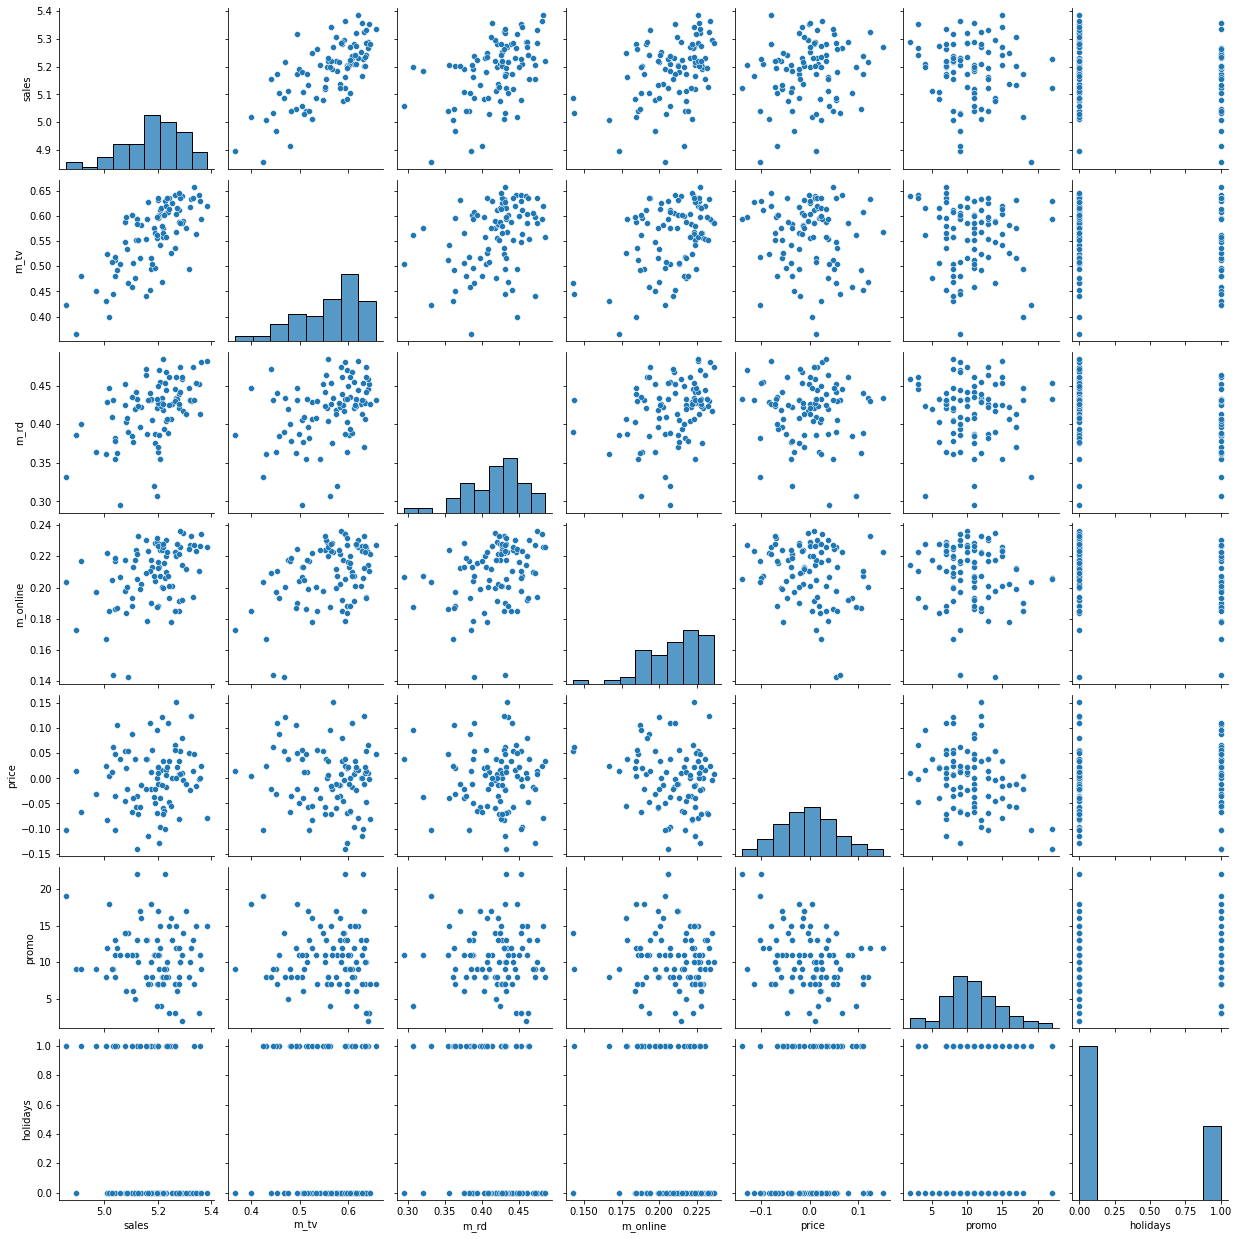

In [120]:
ss.pairplot(data)

<AxesSubplot:>

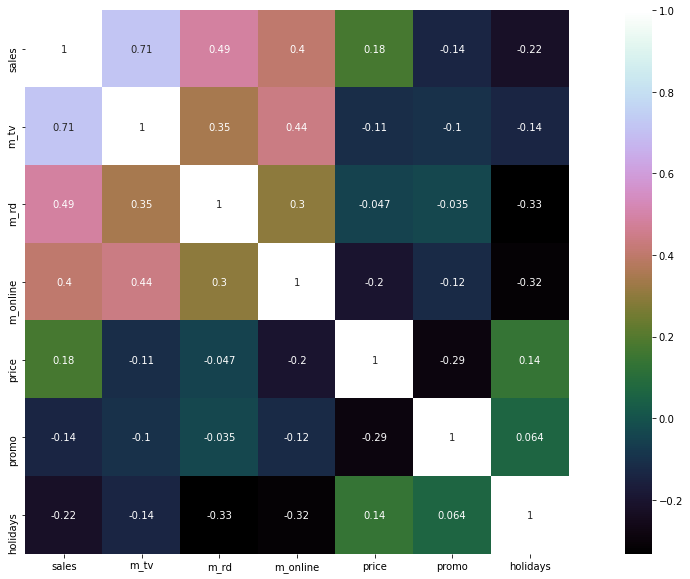

In [122]:
#heatmap to show the relationship between each variable
corr_mat=data.corr(method='pearson')
plt.figure(figsize=(20,10))
ss.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')


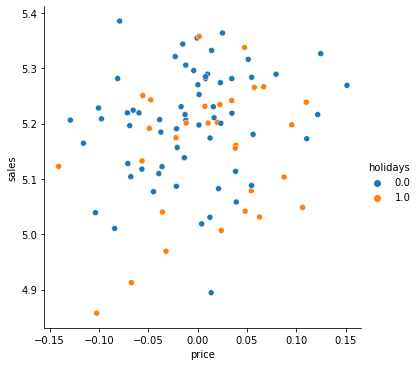

In [105]:
ss.relplot(x='price',y='sales',hue='holidays', data=data)

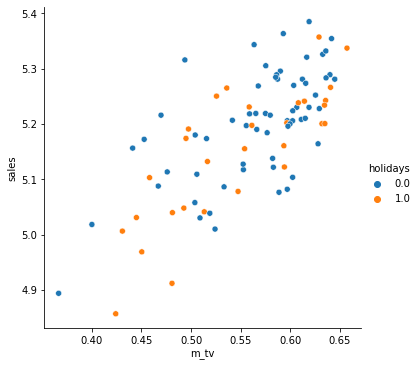

In [106]:
ss.relplot(x='m_tv',y='sales',hue='holidays', data=data)

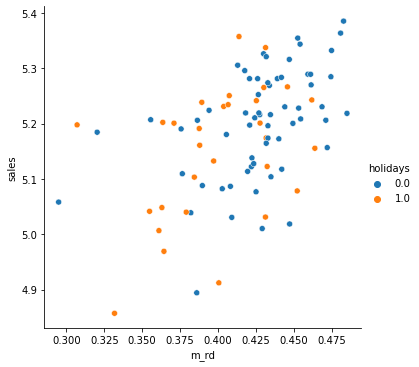

In [107]:
ss.relplot(x='m_rd',y='sales',hue='holidays', data=data)

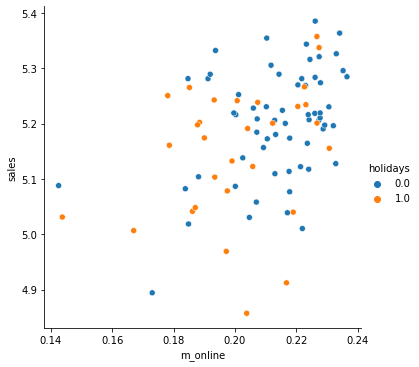

In [108]:
ss.relplot(x='m_online',y='sales',hue='holidays', data=data)

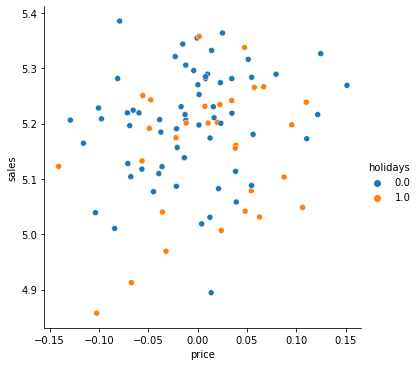

In [109]:
ss.relplot(x='price',y='sales',hue='holidays', data=data)

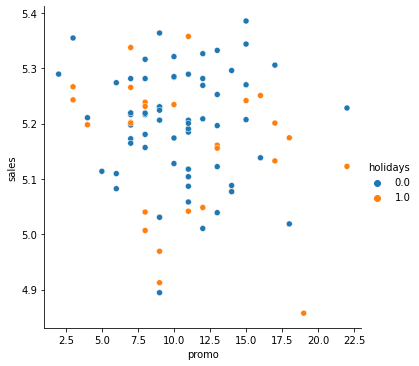

In [34]:
ss.relplot(x='promo',y='sales',hue='holidays', data=data)

C:\Users\yasir\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

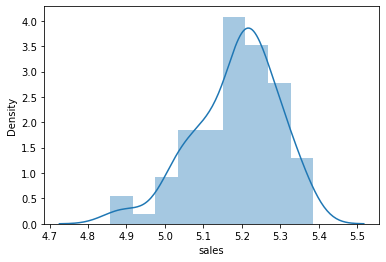

In [35]:
ss.distplot(data['sales'])

C:\Users\yasir\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

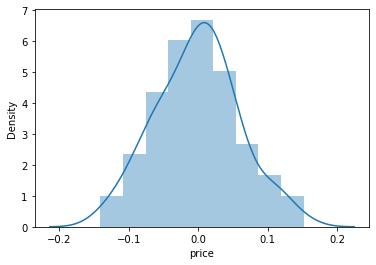

In [36]:
ss.distplot(data['price'])

In [37]:
rolmean=data['sales'].rolling(window=5).mean()
rolstd=data['sales'].rolling(window=5).std()
#print(rolmean, rolstd)

<ipython-input-38-bdf7a63d1a87>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index.values, rotation='vertical', size=8)


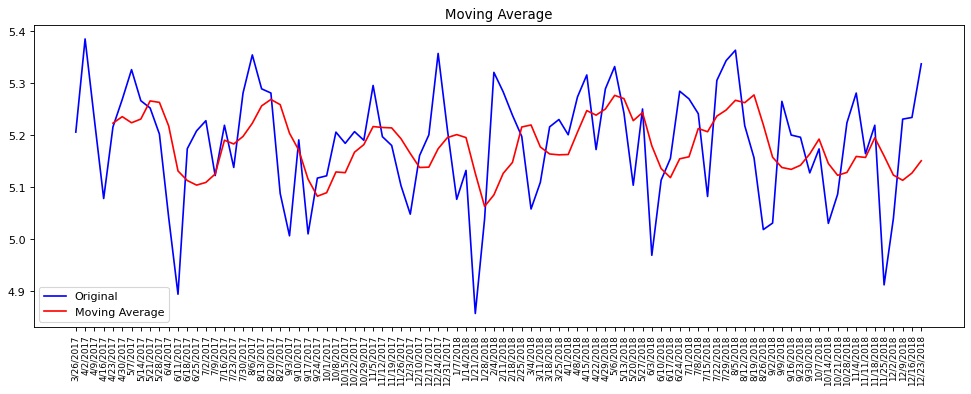

In [38]:
fig, ax= plt.subplots(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
ax.set_xticklabels(data.index.values, rotation='vertical', size=8)
orig=plt.plot(data['sales'],color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Moving Average')

plt.legend(loc='best')
plt.title('Moving Average')
plt.show(block=False)

In [39]:
#graph display function
def graphplot(actual,pred):
    df_temp = pd.DataFrame({'Actual': actual, 'Predicted':pred})
    df_temp.head()
    # Creating Line Graph
    fig, ax= plt.subplots(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
    ax.set_xticklabels(data.index.values, rotation='vertical', size=8)
    y1 = df_temp['Actual']
    y2 = df_temp['Predicted']
    plt.plot(y1, label = 'Actual')
    plt.plot(y2, label = 'Predicted')
    plt.legend()
    plt.show()

<h3> Least Square Regression </h3>

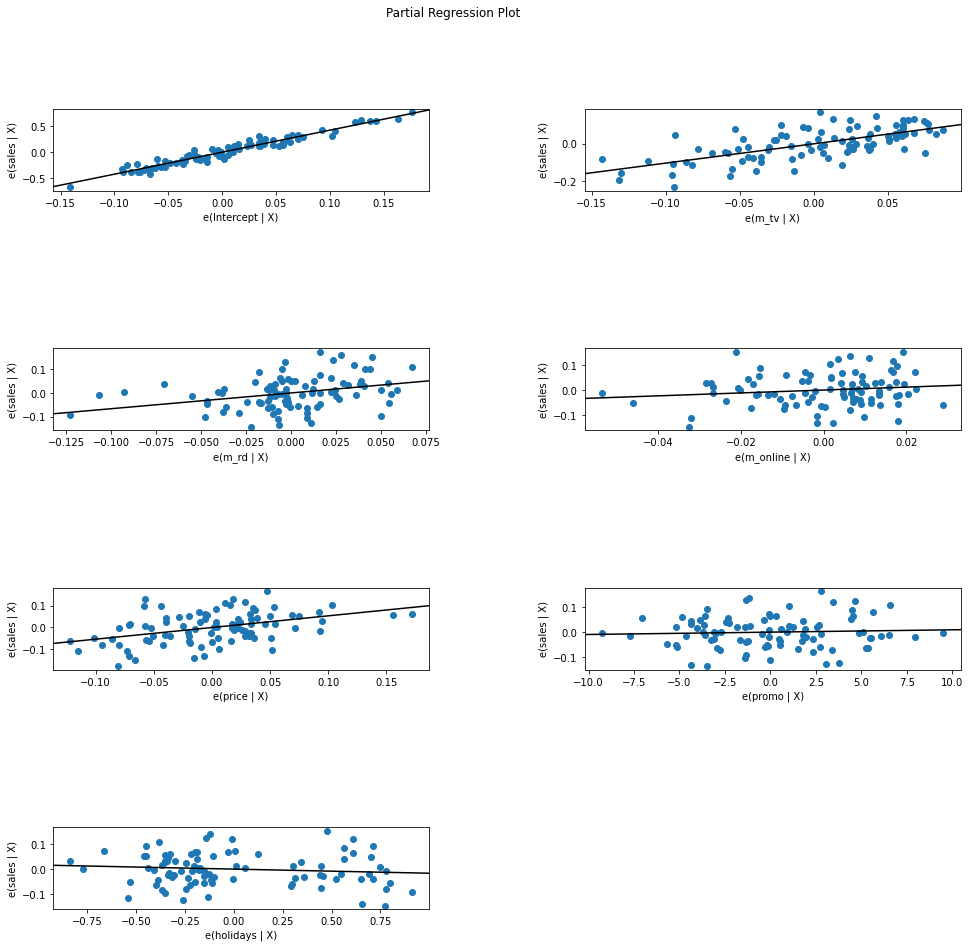

In [40]:
data=pd.read_csv("./Test_data.csv", index_col="date")
data=data.fillna(0) #filling null holidays value with 0
model = sm.ols(formula='sales~m_tv+m_rd+m_online+price+promo+holidays', data=data).fit()
fig= sg.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1)
fig.set_size_inches(15,15)

In [41]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     27.25
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           6.82e-18
Time:                        00:08:55   Log-Likelihood:                 123.52
No. Observations:                  92   AIC:                            -233.0
Df Residuals:                      85   BIC:                            -215.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2039      0.110     38.056      0.0

<ipython-input-39-65f5c865de36>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index.values, rotation='vertical', size=8)


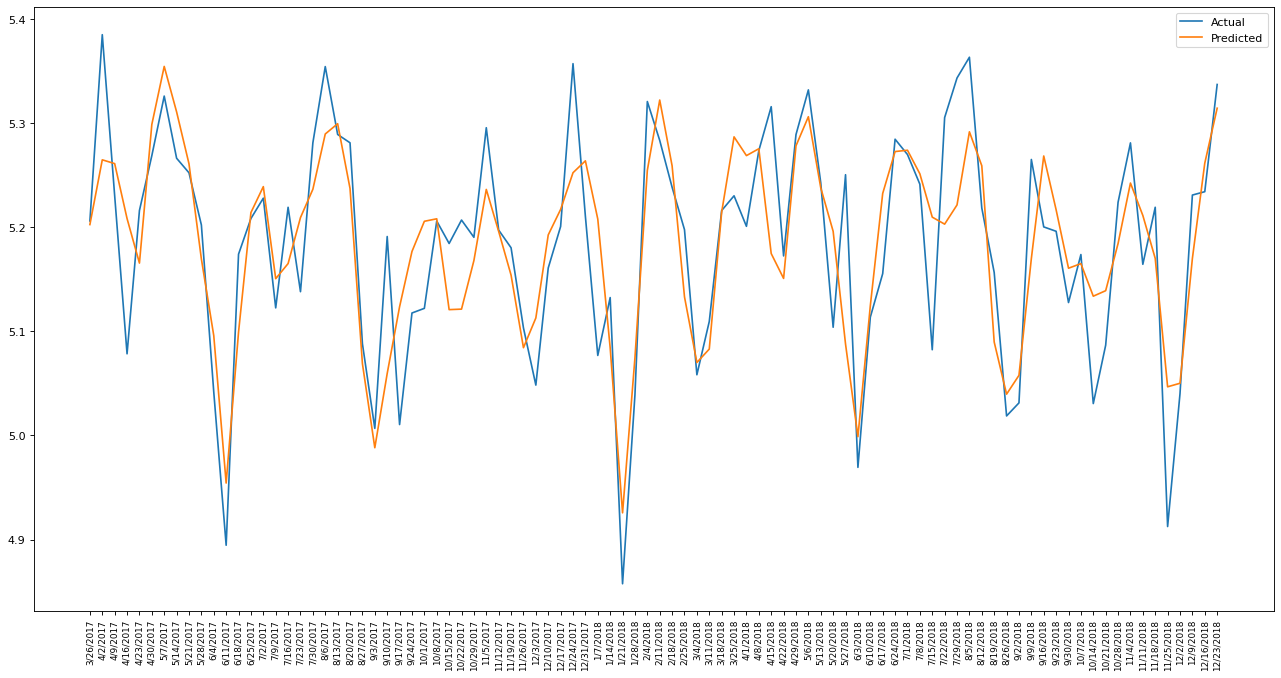

In [42]:
# Defining Actual and Predicted values
y_pred = model.predict()
labels = data['sales']
graphplot(labels,y_pred)

In [46]:
rmse= np.sqrt(np.mean((labels-y_pred)**2))

In [47]:
R2= 1 - (np.sum((labels-y_pred)**2)/np.sum((labels-labels.mean())**2))

In [48]:
print('RMSE:',rmse,'R2:',R2)

RMSE: 0.06319438306562114 R2: 0.6579094693894467


<h3>Random forest model</h3>

<AxesSubplot:title={'center':'Feature Importance'}>

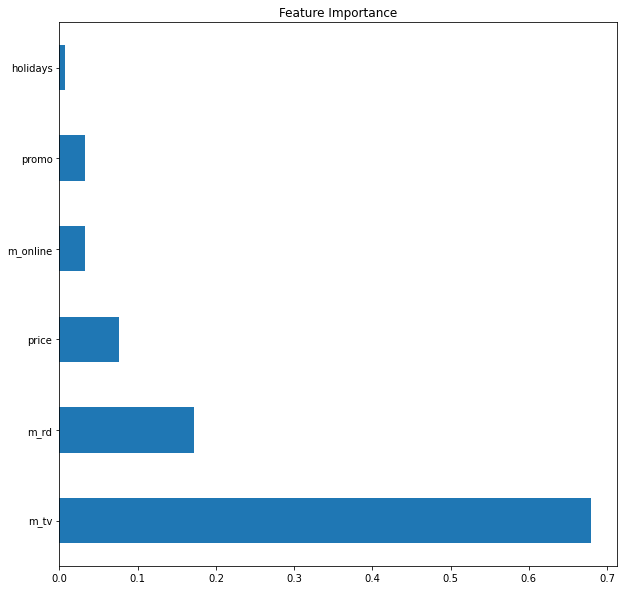

In [504]:
#reading data from the source
data=pd.read_csv("./Test_data.csv", index_col="date")
data=data.fillna(0) #filling null holidays value with 0
# Setting X and y variables
X = data.loc[:, data.columns != 'sales']
y = data['sales']
# Building Random Forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.65, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10), title='Feature Importance')

<ipython-input-39-65f5c865de36>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index.values, rotation='vertical', size=8)


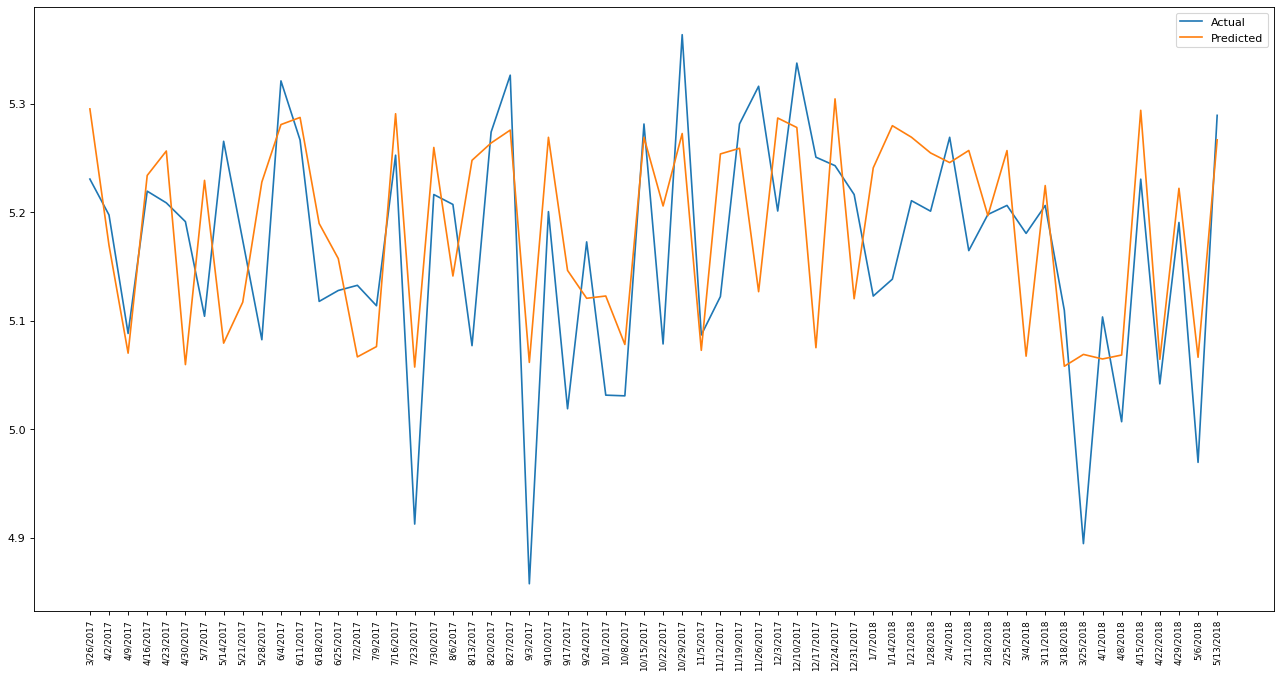

In [505]:
graphplot(y_test,pred)

In [506]:
R2= 1 - (np.sum((y_test-pred)**2)/np.sum((y_test-y_test.mean())**2))
rmse= np.sqrt(np.mean((y_test-pred)**2))
print('RMSE:',rmse,'R2:',R2)

RMSE: 0.09144175787950105 R2: 0.28888490870535644


<h3> Gradient Boosting Regression</h3>

In [496]:
#reading data from the source
data=pd.read_csv("./Test_data.csv", index_col="date")
data=data.fillna(0) #filling null holidays value with 0
y1=data['sales']
x1=data.drop('sales',axis=1)
#x1=x1.drop('holidays',axis=1)
#x1=x1.drop('promo',axis=1)

In [497]:
#Splitting Data into Training and Test Sets
x_train,x_test,y_train,y_test = train_test_split(x1,y1,train_size=0.7, shuffle=True, random_state=1)

In [498]:
from sklearn.ensemble import GradientBoostingRegressor
#params={'n_estimators':7,'max_depth':3,'learning_rate':1,'criterion':'mse'}
model= GradientBoostingRegressor()


In [499]:
model.fit(x_train,y_train)


GradientBoostingRegressor()

In [500]:
y1_pred=model.predict(x_test)

<ipython-input-39-65f5c865de36>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index.values, rotation='vertical', size=8)


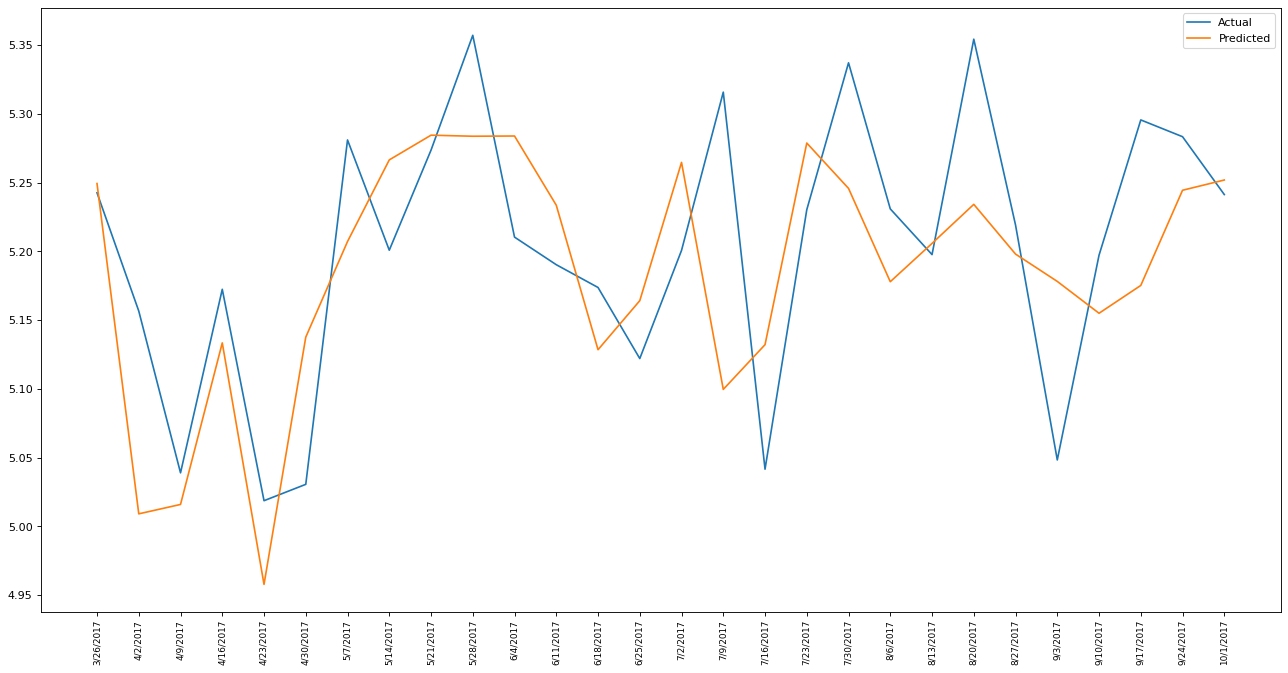

In [501]:
graphplot(y_test,y1_pred)

In [503]:
R2= 1 - (np.sum((y_test-y1_pred)**2)/np.sum((y_test-y_test.mean())**2))
rmse= np.sqrt(np.mean((y_test-y1_pred)**2))
print('RMSE:',rmse,'R2:',R2)

RMSE: 0.08186369521991217 R2: 0.2775348694540033


<h3>Least Square Regression between TV and Sales</h3>

In [466]:
dff=pd.read_csv("./Test_data.csv", index_col="date")
dff=dff.fillna(0) #filling null holidays value with 0
Xx=dff.drop('sales', axis=1)
Xx=Xx.drop('promo', axis=1)
#Xx=Xx.drop('price', axis=1)
#Xx=Xx.drop('holidays', axis=1)
Yy=dff['sales']
x_train, x_test, y_train, y_test = train_test_split(Xx, Yy, train_size = 0.7, test_size = 0.3, random_state = 100)
x_train_sm = ssm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr = ssm.OLS(y_train, x_train_sm).fit()

In [467]:
lr.params

const       4.298477
m_tv        0.869896
m_rd        0.631334
m_online    0.693414
price       0.450731
holidays   -0.012147
dtype: float64

In [468]:
# Add a constant to X_test
x_test_sm = ssm.add_constant(x_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(x_test_sm)
x_test.shape

(28, 5)

In [469]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

C:\Users\yasir\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


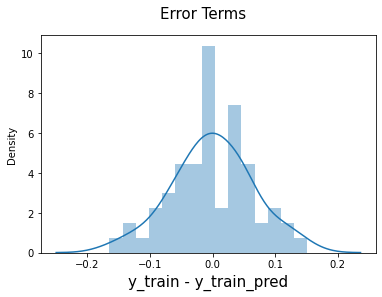

In [470]:
fig = plt.figure()
ss.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [478]:
# Add a constant to X_test
X_test_sm = ssm.add_constant(x_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)


In [479]:

np.sqrt(mean_squared_error(y_test, y_pred))

0.06438692601724305

In [480]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7427198358368345

<ipython-input-39-65f5c865de36>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index.values, rotation='vertical', size=8)


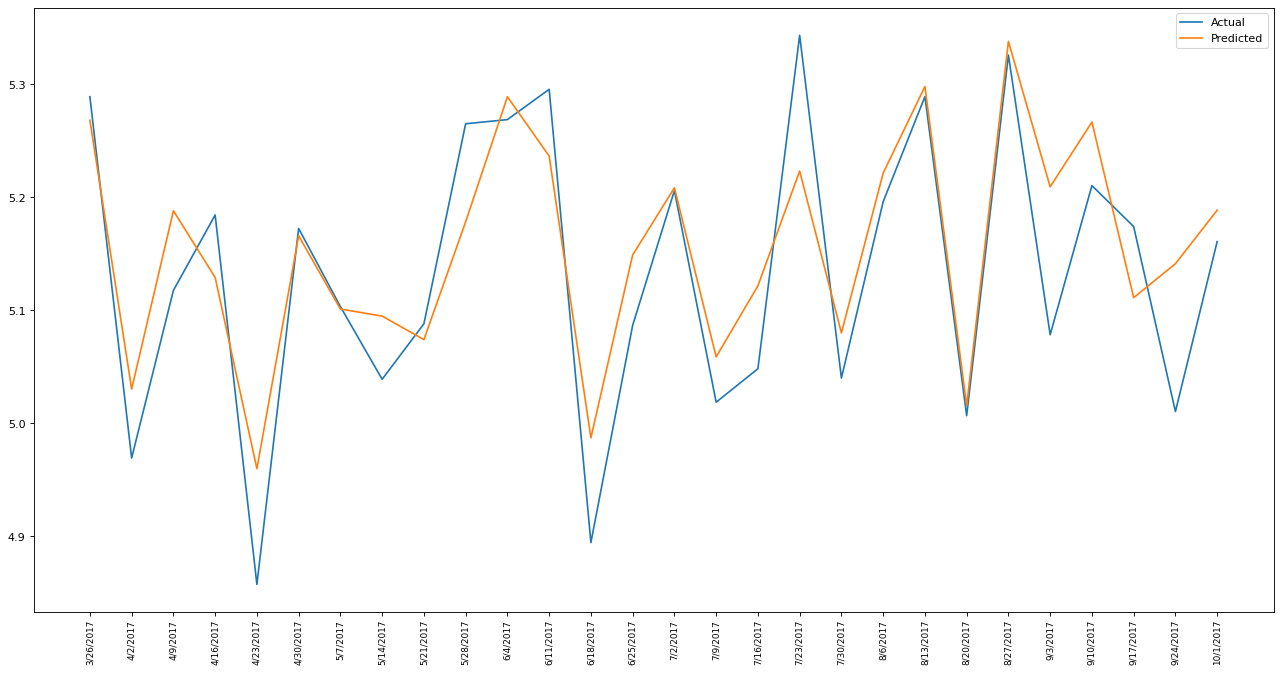

In [474]:
graphplot(y_test,y_pred)

<h3>Multiple Regression</h3>

In [284]:
dff=pd.read_csv("./Test_data.csv", index_col="date")
dff=dff.fillna(0) #filling null holidays value with 0

In [285]:
dff = pd.concat([pd.Series(1, index=dff.index, name='00'), dff], axis=1)
dff.head()


,00,sales,m_tv,m_rd,m_online,price,promo,holidays
date,,,,,,,,
3/26/2017,1,5.206100,0.596845,0.471012,0.227368,-0.128877,9,0.0
4/2/2017,1,5.385093,0.618830,0.482700,0.226155,-0.078913,15,0.0
4/9/2017,1,5.230386,0.606462,0.468500,0.210219,-0.016652,9,0.0
4/16/2017,1,5.078445,0.547290,0.452152,0.197514,0.054442,14,1.0
4/23/2017,1,5.216146,0.469708,0.434500,0.200274,0.121796,8,0.0


In [286]:
X = dff.drop('sales',axis=1)
y = dff['sales']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
x_train

,00,m_tv,m_rd,m_online,price,promo,holidays
date,,,,,,,
1/14/2018,1,0.516468,0.397065,0.199029,-0.056190,17,1.0
9/16/2018,1,0.599595,0.449309,0.216399,0.023660,11,0.0
8/20/2017,1,0.587071,0.439052,0.184679,0.034756,12,0.0
10/28/2018,1,0.602381,0.394049,0.215447,-0.065180,9,0.0
11/12/2017,1,0.555573,0.420819,0.229251,0.001459,7,0.0
...,...,...,...,...,...,...,...
9/30/2018,1,0.552412,0.423481,0.232859,-0.070669,10,0.0
11/25/2018,1,0.480775,0.400487,0.216792,-0.067048,9,1.0
7/8/2018,1,0.614107,0.425215,0.200725,0.034686,15,1.0


In [287]:
#normalizing the column values
for i in x_train.columns:
    x_train[i] = x_train[i]/np.max(x_train[i])

<ipython-input-287-1466048bb0ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[i] = x_train[i]/np.max(x_train[i])


In [288]:
theta= np.array([0]*len(x_train.columns), dtype=float)
#Output: array([0, 0, 0])
theta

array([0., 0., 0., 0., 0., 0., 0.])

In [289]:
def hypothesis(theta,xx):
    return theta*xx

In [290]:
def computeCost(xx, y, theta):
    y1 = hypothesis(theta, xx)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*len(dff))

In [291]:
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - (alpha*(sum((y1-y)*X.iloc[:,c])/len(X)))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [298]:
J, j, theta = gradientDescent(x_train, y_train, theta, 0.49, 10000)

In [299]:
y_hat = hypothesis(theta, x_test)
y_hat = np.sum(y_hat, axis=1)

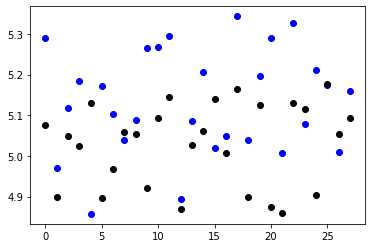

In [300]:
%matplotlib inline

plt.figure()
plt.scatter(x=list(range(0, 28)),y= y_test, color='blue')         
plt.scatter(x=list(range(0, 28)), y=y_hat, color='black')
plt.show()

<ipython-input-39-65f5c865de36>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index.values, rotation='vertical', size=8)


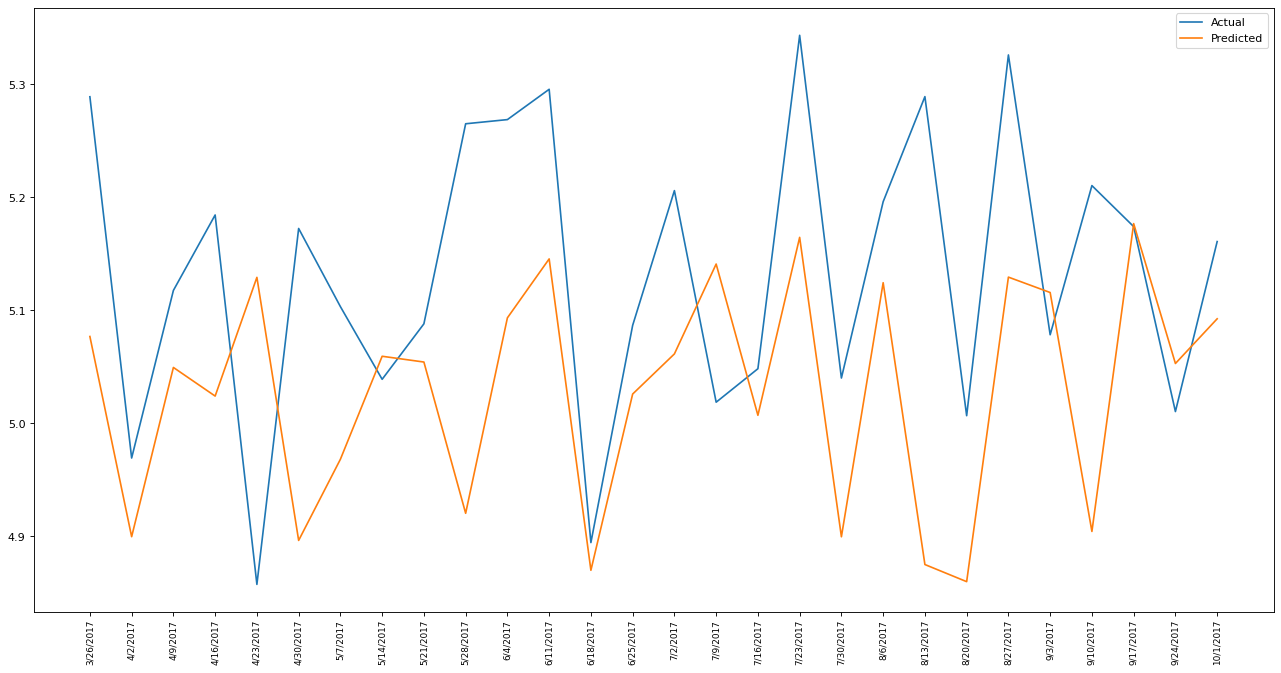

In [301]:
graphplot(y_test,y_hat)

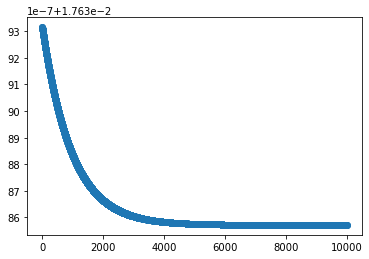

In [302]:
plt.figure()
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()

In [481]:
R2= 1 - (np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2))
rmse= np.sqrt(np.mean((y-y_hat)**2))
print('RMSE:',rmse,'R2:',R2)

RMSE: 0.17467448556452914 R2: 0.20454934165008098
